## Introduction

In this exploration, we embark on a comprehensive journey through a dataset that offers insights into the realm of global sugar prices. Our endeavor involves delving into a meticulous analysis of historical trends, intricate patterns, and distinct factors that influence the fluctuations within the world sugar market.

## Dataset Overview:

The dataset in focus is drawn from Kaggle, specifically from the [Kaggle: Global Commodity Prices: Monthly Data (1960-2022)](https://www.kaggle.com/datasets/utkarshx27/select-world-bank-commodity-price-data) repository. Within this dataset, we find a valuable collection of data points centered around world sugar prices.

Specifically centered around world sugar prices, the dataset offers a comprehensive historical time-series of observations. These observations provide an intricate record of sugar prices over time, enabling researchers and analysts to deeply investigate the complex patterns and fluctuations within this critical commodity market.

Presenting a specialized perspective on the historical price dynamics of one of the world's most consumed commodities, this Exploratory Data Analysis (EDA) employs the provided dataset to unveil compelling insights. By meticulously analyzing the historical price data, we have enriched our comprehension of the factors that influence sugar price trends and their potential consequences.

**Note:**\
Detail about the sugar (World) column, International Sugar Agreement (ISA) daily price, raw, f.o.b. and stowed at greater Caribbean ports ($/kg).

To explore this dataset we need to install pandas, seaborn and matplotlib. We are also doing some statistics analysis about mean, percentile & others.

In [1]:
# pip install pandas matplotlib seaborn

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from statistics import mean
from scipy import stats

In [3]:
# Load in the directory of the dataset
file_dir = './global_commodity_prices/commodity_prices.csv'

In [4]:
# Load data into dataframe
df = pd.read_csv(file_dir)
df.drop(['Unnamed: 0', 'oil_brent', 'oil_dubai', 'coffee_arabica',
       'coffee_robustas', 'tea_columbo', 'tea_kolkata', 'tea_mombasa',
       'sugar_eu', 'sugar_us'], axis = 1, inplace = True)
# Convert 'date' column to datetime object
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,sugar_world
0,1960-01-01,0.0666
1,1960-02-01,0.0679
2,1960-03-01,0.0683
3,1960-04-01,0.0681
4,1960-05-01,0.0683


In [5]:
df.dtypes

date           datetime64[ns]
sugar_world           float64
dtype: object

We are confined to the `date` and `sugar_world` price columns. To enrich our dataset, we capitalize on the `date` column by incorporating additional features such as `month`, `day`, `weekday`, `year`, `is_weekend`, and `is_weekday`. These attributes are part of the time series functions available under the pandas library.

In [6]:
# Add 'month' column
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday # returns the day of the week as an integer, where Monday is 0 and Sunday is 6
df['year'] = df['date'].dt.year
# Add column for weekend and weekday
df['is_weekend'] = (df['date'].dt.weekday >= 5).astype(int)
df['is_weekday'] = ((df['date'].dt.weekday >= 0) & (df['date'].dt.weekday <= 4)).astype(int)

# Display dataframe with new column
df.head()

,date,sugar_world,month,day,weekday,year,is_weekend,is_weekday
0,1960-01-01,0.0666,1,1,4,1960,0,1
1,1960-02-01,0.0679,2,1,0,1960,0,1
2,1960-03-01,0.0683,3,1,1,1960,0,1
3,1960-04-01,0.0681,4,1,4,1960,0,1
4,1960-05-01,0.0683,5,1,6,1960,1,0


In [7]:
df.columns

Index(['date', 'sugar_world', 'month', 'day', 'weekday', 'year', 'is_weekend',
       'is_weekday'],
      dtype='object')

### Weekday Column Exploration

The exploration of weekday columns unveils intriguing insights into the rhythmic patterns that govern sugar prices within specific days of the week. This unique lens allows us to identify potential correlations between sugar prices and the days of the week. 

By meticulously examining the relationship between sugar prices and weekdays, we aim to uncover whether certain days consistently exhibit distinctive price behaviors. Such revelations can have far-reaching implications for market strategies, risk management, and decision-making.

In [8]:
df['weekday'].value_counts().sort_index()

weekday
0    108
1    108
2    108
3    108
4    110
5    107
6    107
Name: count, dtype: int64

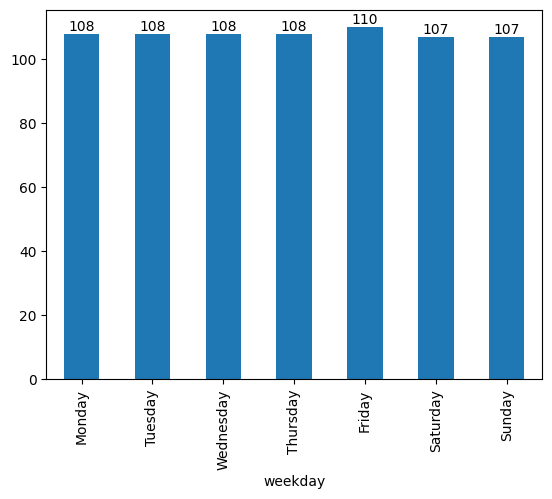

In [9]:
# Plot
counts = df['weekday'].value_counts().sort_index()
ax = counts.plot(kind='bar')
for i, v in enumerate(counts):
    ax.text(i, v+1, str(v), ha='center')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

Upon revisiting the distribution of sugar price data across weekdays, we observe the following pattern:

- **Monday (weekday 0)** to **Thursday (weekday 3)** consistently record 108 instances of sugar price observations each.
- **Friday (weekday 4)** exhibits the highest number of sugar price observations, with a count of 110 instances.
- Both **Saturday (weekday 5)** and **Sunday (weekday 6)** share the lowest number of sugar price observations, each with 107 instances.

This distribution reaffirms the varying frequency of sugar price observations across different weekdays. Recognizing these trends aids in uncovering potential correlations and patterns influenced by specific days of the week. Further exploration of such patterns can contribute to a more comprehensive understanding of how weekdays interplay with sugar price dynamics, informing strategic decision-making within the sugar market.

For insanity check, we can add theese values above on our graph and get the sum.

In [10]:
# Display the length of our dataset
len(df)

756

In [11]:
# Sum of the values represented on our graph
sum_vchart = 110 + 108 + 108 + 108 + 108 + 107 + 107
sum_vchart

756

Compare with the total number of rows of our dataset.

In [12]:
len(df) == sum_vchart

True

### Describe Function

In Python, we will be utilizing the describe() method to obtain a comprehensive summary of statistics from a given dataframe. This summary encompasses essential metrics such as mean, count, standard deviation, percentiles, as well as minimum and maximum values for the features under consideration.

For a deeper understanding and additional information, you can refer to the official documentation: [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [13]:
price_stats = df['sugar_world'].describe()
print(price_stats)

count    756.000000
mean       0.240263
std        0.151947
min        0.028700
25%        0.139705
50%        0.215285
75%        0.309325
max        1.237700
Name: sugar_world, dtype: float64


### Histogram
Furthermore, we can enhance our analysis by creating histograms to visually represent the distribution of data. Histograms provide valuable insights into the frequency and spread of values within each feature.

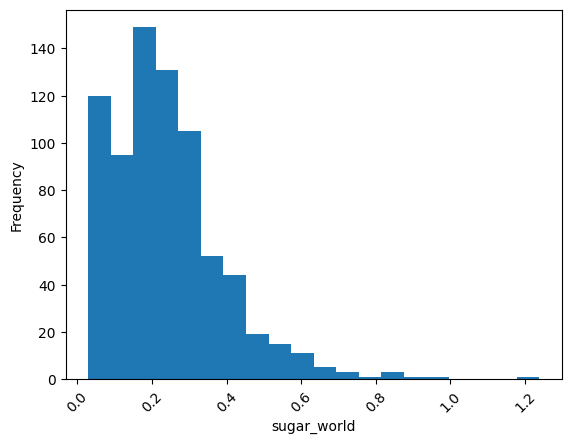

In [14]:
# Plot histogram of 'sugar_world' price column
plt.hist(df['sugar_world'], bins=20)
plt.xlabel('sugar_world')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

Mean (mu) = 0.24 and Standard Deviation (sigma) = 0.15


/tmp/ipykernel_73249/1472119385.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sugar_world'], fit=norm)


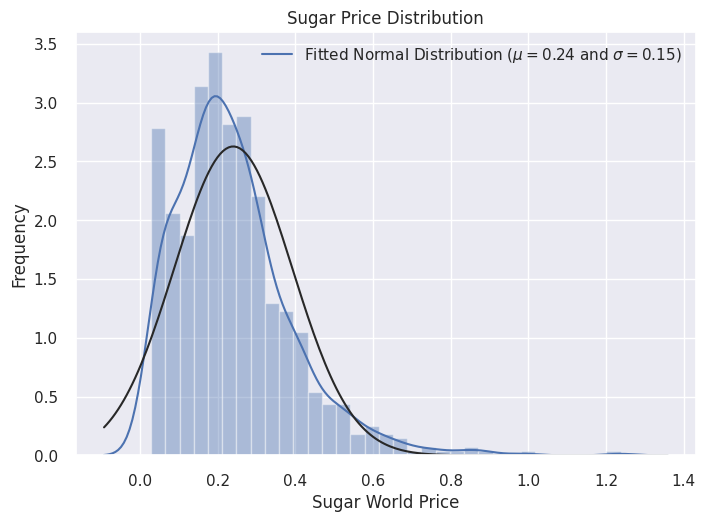

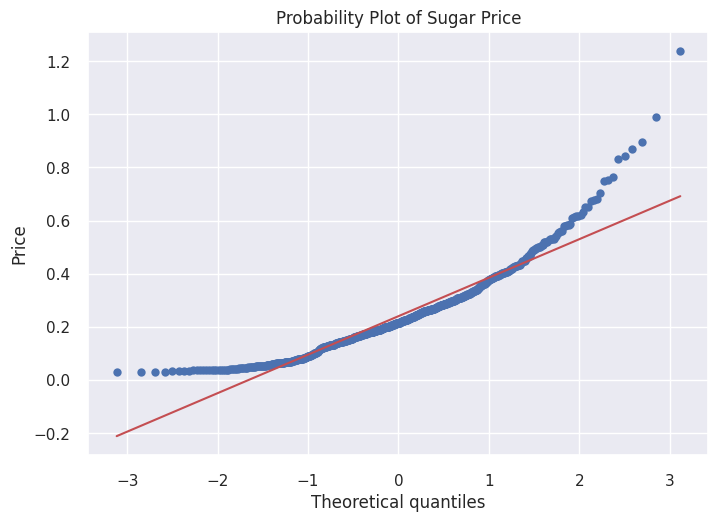

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Plot the distribution of 'sugar_world' prices
sns.distplot(df['sugar_world'], fit=norm)

# Get the fitted parameters of the normal distribution
(mu, sigma) = norm.fit(df['sugar_world'])
print(f'Mean (mu) = {mu:.2f} and Standard Deviation (sigma) = {sigma:.2f}')

# Add legend and labels to the plot
plt.legend([f'Fitted Normal Distribution ($\mu=${mu:.2f} and $\sigma=${sigma:.2f})'], loc='best')
plt.ylabel('Frequency')
plt.xlabel('Sugar World Price')
plt.title('Sugar Price Distribution')

# Create a QQ-plot to assess normality
fig = plt.figure()
res = stats.probplot(df['sugar_world'], plot=plt)
plt.ylabel('Price')
plt.title('Probability Plot of Sugar Price')
plt.show()


Here is how to interpret a Probability Plot:
* Straight Line: If the points lie approximately on a straight line, it indicates that the data is close to the normal distribution. This means that the data's quantiles match those of the theoretical normal distribution.

* Curved Line: If the points curve away from the straight line in either direction, it suggests that the data deviates from normality. The direction of the curve indicates the type of deviation (skewness) in the data.

* S-Shaped Curve: An S-shaped curve suggests heavy-tailed or lighter-tailed distributions compared to the normal distribution.

* Points Outside Line: Points outside the line suggest outliers or extreme values.

In [28]:
# Let's calculate 95th percentile of 'sugar_world' prices
percentile_95 = np.percentile(df['sugar_world'], 95)
print(f"The 95th percentile of 'sugar_world' prices is: {percentile_95:.2f}")

The 95th percentile of 'sugar_world' prices is: 0.52


The 95th percentile, specifically, is the value below which 95% of the data points in a dataset lie. In other words, if you calculate the 95th percentile of a dataset, it indicates that 95% of the data points are below or equal to that value, and only 5% of the data points are above it. It's often used to identify extreme values or outliers in a dataset and to understand the distribution of data beyond the bulk of the values.

### Investigating the dataset and generating a new subset dataframe for quarterly analysis

In [15]:
len(df.loc[df['year'] == 1960, ['year', 'sugar_world']])

12

In [16]:
lst_year = df['year'].unique()
lst_year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int32)

In [17]:
# Create a list to store the calculated lengths
prices_lengths = []

# Loop through unique years
for i in lst_year:
    filtered_subset = df[df['year'] == i]  # Filter rows where year matches i
    length = len(filtered_subset)  # Calculate the length of the filtered subset
    prices_lengths.append(length)  

# Get the unique values on the prices_lengths
unique_prices_lengths = list(set(prices_lengths))
unique_prices_lengths

[12]

### Performing random sampling on our dataset to observe the length of price data points per year.

In [18]:
# Random
yr_list = df['year'].unique()

rand_year = random.choice(yr_list)

print(rand_year)
print(len(df.loc[df['year'] == rand_year, ['year', 'sugar_world']]))

2019
12


Utilizing the findings from the random sampling regarding the length of price data points per year, we have determined that there are 12 prices recorded per year. This insight enables us to derive quarterly prices for the 'sugar_world' feature per year. The following code snippet demonstrates the aggregation process and the creation of a quarterly dataframe:

### A Quarterly Subset

In [19]:
df_sugar= df[['year', 'sugar_world']]
df_sugar_qrtr = df_sugar[:12].copy()
df_sugar_qrtr

,year,sugar_world
0,1960,0.0666
1,1960,0.0679
2,1960,0.0683
3,1960,0.0681
4,1960,0.0683
5,1960,0.0666
6,1960,0.0728
7,1960,0.0741
8,1960,0.0725
9,1960,0.0538


We are trying to create a sample column for price quarterly for year 1960 using index slicing.

In [20]:
# 1960 df subset
df_sugar_1960 = df_sugar_qrtr.copy()

df_sugar_1960['qrtr'] = 0
df_sugar_1960.loc[:2, 'qrtr'] = df_sugar_1960['sugar_world'][:3].mean()
df_sugar_1960.loc[3:5, 'qrtr'] = df_sugar_1960['sugar_world'][3:6].mean()
df_sugar_1960.loc[6:8, 'qrtr'] = df_sugar_1960['sugar_world'][6:9].mean()
df_sugar_1960.loc[9:11,'qrtr'] = df_sugar_1960['sugar_world'][9:12].mean()
df_sugar_1960[:12]

,year,sugar_world,qrtr
0,1960,0.0666,0.067600
1,1960,0.0679,0.067600
2,1960,0.0683,0.067600
3,1960,0.0681,0.067667
4,1960,0.0683,0.067667
5,1960,0.0666,0.067667
6,1960,0.0728,0.073133
7,1960,0.0741,0.073133
8,1960,0.0725,0.073133
9,1960,0.0538,0.056433


Now, we succesfully created a sample column that would calculate the quarterly price. We can create a loop to iterate through the dataset and calculate the quarterly price per year for the entire dataset.

In [21]:
df_sugar_quarterly = df.copy()

# Initialize the 'qrtr' column with zeros
df_sugar_quarterly['price_quarterly'] = 0

# Define the range and step size
start = 0
end = len(df_sugar_quarterly)
step = 3

# Loop through the specified range with the given step size
for i in range(start, end, step):
    current_range = (i, i+2)
    mean_qrtr = df_sugar_quarterly['sugar_world'][current_range[0]:current_range[1]+1].mean()
    df_sugar_quarterly.loc[current_range[0]:current_range[1], 'price_quarterly'] = mean_qrtr

# Print df_sugar_quarterly dataframe
print(df_sugar_quarterly['price_quarterly'])

0      0.067600
1      0.067600
2      0.067600
3      0.067667
4      0.067667
         ...   
751    0.395656
752    0.395656
753    0.403886
754    0.403886
755    0.403886
Name: price_quarterly, Length: 756, dtype: float64


In [22]:
df_sugar_quarterly

,date,sugar_world,month,day,weekday,year,is_weekend,is_weekday,price_quarterly
0,1960-01-01,0.066600,1,1,4,1960,0,1,0.067600
1,1960-02-01,0.067900,2,1,0,1960,0,1,0.067600
2,1960-03-01,0.068300,3,1,1,1960,0,1,0.067600
3,1960-04-01,0.068100,4,1,4,1960,0,1,0.067667
4,1960-05-01,0.068300,5,1,6,1960,1,0,0.067667
...,...,...,...,...,...,...,...,...,...
751,2022-08-01,0.393525,8,1,0,2022,0,1,0.395656
752,2022-09-01,0.390659,9,1,3,2022,0,1,0.395656
753,2022-10-01,0.386911,10,1,5,2022,1,0,0.403886
754,2022-11-01,0.407414,11,1,1,2022,0,1,0.403886


By consolidating the data in this manner, we attain a finer perspective on the variances in sugar prices over the course of the year quarterly.

### Visualize Quarterly Sugar Trends

In this section, we delve into the process of visualizing quarterly sugar price trends over the years using a carefully crafted code snippet. The primary objective is to provide insights into how sugar prices have fluctuated throughout time on a quarterly basis. The code performs multiple steps, including the creation of a subset dataframe that retains essential information while removing duplicates. Subsequently, it employs data visualization techniques to present the findings in a comprehensible manner.

Let's explore the code that accomplishes these tasks and sheds light on the quarterly trends of sugar prices. Through the ensuing visualizations, we gain a clearer understanding of the dynamics and patterns that shape the sugar market.

/tmp/ipykernel_73249/248726834.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


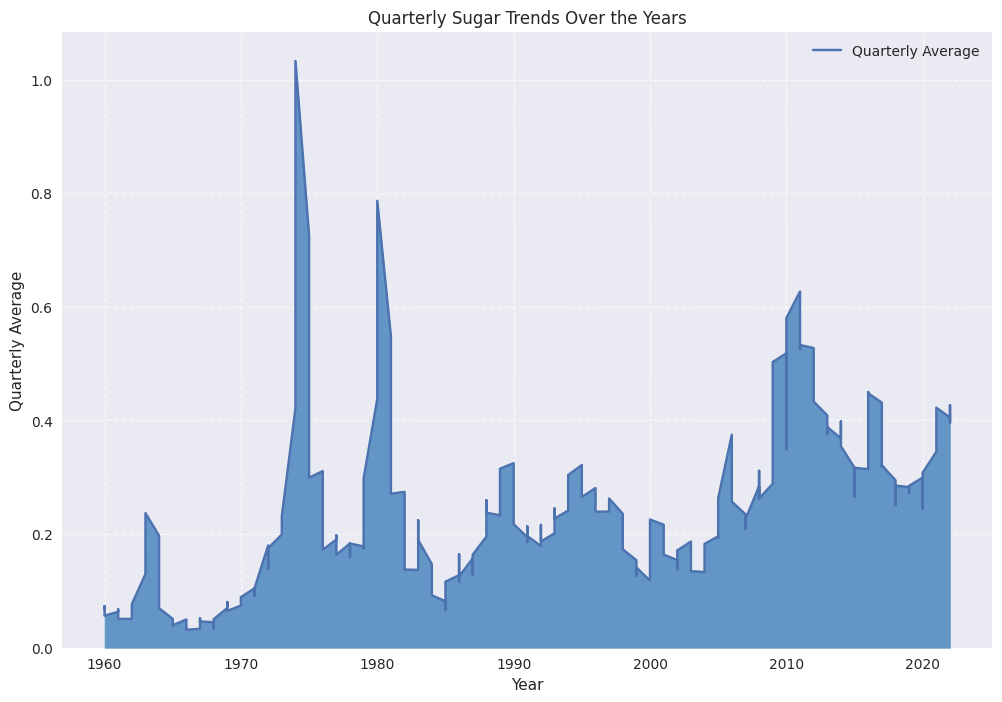

In [23]:
# Create a new subset df for year and qrtr prices,removing duplicates
df_sugar_no_dup =  df_sugar_quarterly.copy()
df_sugar_no_dup = df_sugar_no_dup.drop('sugar_world', axis = 1)
df_sugar_no_dup = df_sugar_no_dup.drop_duplicates()

# Plot
plt.style.use('seaborn')
ax = df_sugar_no_dup[['year', 'price_quarterly']].plot(kind='area', x='year', y='price_quarterly', figsize=(12, 8))
plt.grid(True, linestyle='--', alpha=0.7)
ax.fill_between(df_sugar_no_dup['year'], df_sugar_no_dup['price_quarterly'], color='skyblue', alpha=0.4)
plt.title('Quarterly Sugar Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Quarterly Average')
plt.legend(["Quarterly Average"])
plt.show();

### A Yearly Subset

In our endeavor to gain deeper insights into the dynamics of sugar prices, we expand our analysis to encompass a yearly perspective. This undertaking entails the creation of a new subset derived from the main dataset, allowing us to cultivate a more comprehensive yearly outlook. Through the process of aggregating sugar prices over annual intervals, we can unveil broader patterns, identify enduring trends, and extract valuable insights that might be obscured within shorter timeframes. This approach empowers us to capture the overarching essence of the sugar market's behavior and its interaction with the broader economic context.

In [24]:
# Subset for 'sugar_world' & 'year' column
df_sugar = df[['year', 'sugar_world']]

# Group by week and calculate mean of 'sugar_world', 'sugar_eu', and 'sugar_us' columns
df_sugar_yearly = df_sugar.groupby('year').mean()
df_sugar_yearly

,sugar_world
year,
1960,0.066208
1961,0.059450
1962,0.061683
1963,0.183233
1964,0.126325
...,...
2018,0.275614
2019,0.280023
2020,0.283128


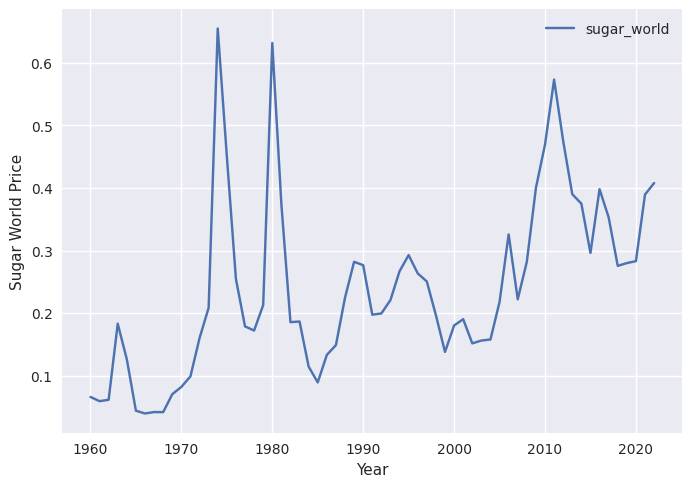

In [25]:
df_sugar_yearly.plot(kind='line', y='sugar_world')
plt.xlabel('Year')
plt.ylabel('Sugar World Price')
plt.show()

### Incorporate the graphical representation of both the quarterly and yearly price trends.

In [26]:
df

,date,sugar_world,month,day,weekday,year,is_weekend,is_weekday
0,1960-01-01,0.066600,1,1,4,1960,0,1
1,1960-02-01,0.067900,2,1,0,1960,0,1
2,1960-03-01,0.068300,3,1,1,1960,0,1
3,1960-04-01,0.068100,4,1,4,1960,0,1
4,1960-05-01,0.068300,5,1,6,1960,1,0
...,...,...,...,...,...,...,...,...
751,2022-08-01,0.393525,8,1,0,2022,0,1
752,2022-09-01,0.390659,9,1,3,2022,0,1
753,2022-10-01,0.386911,10,1,5,2022,1,0
754,2022-11-01,0.407414,11,1,1,2022,0,1


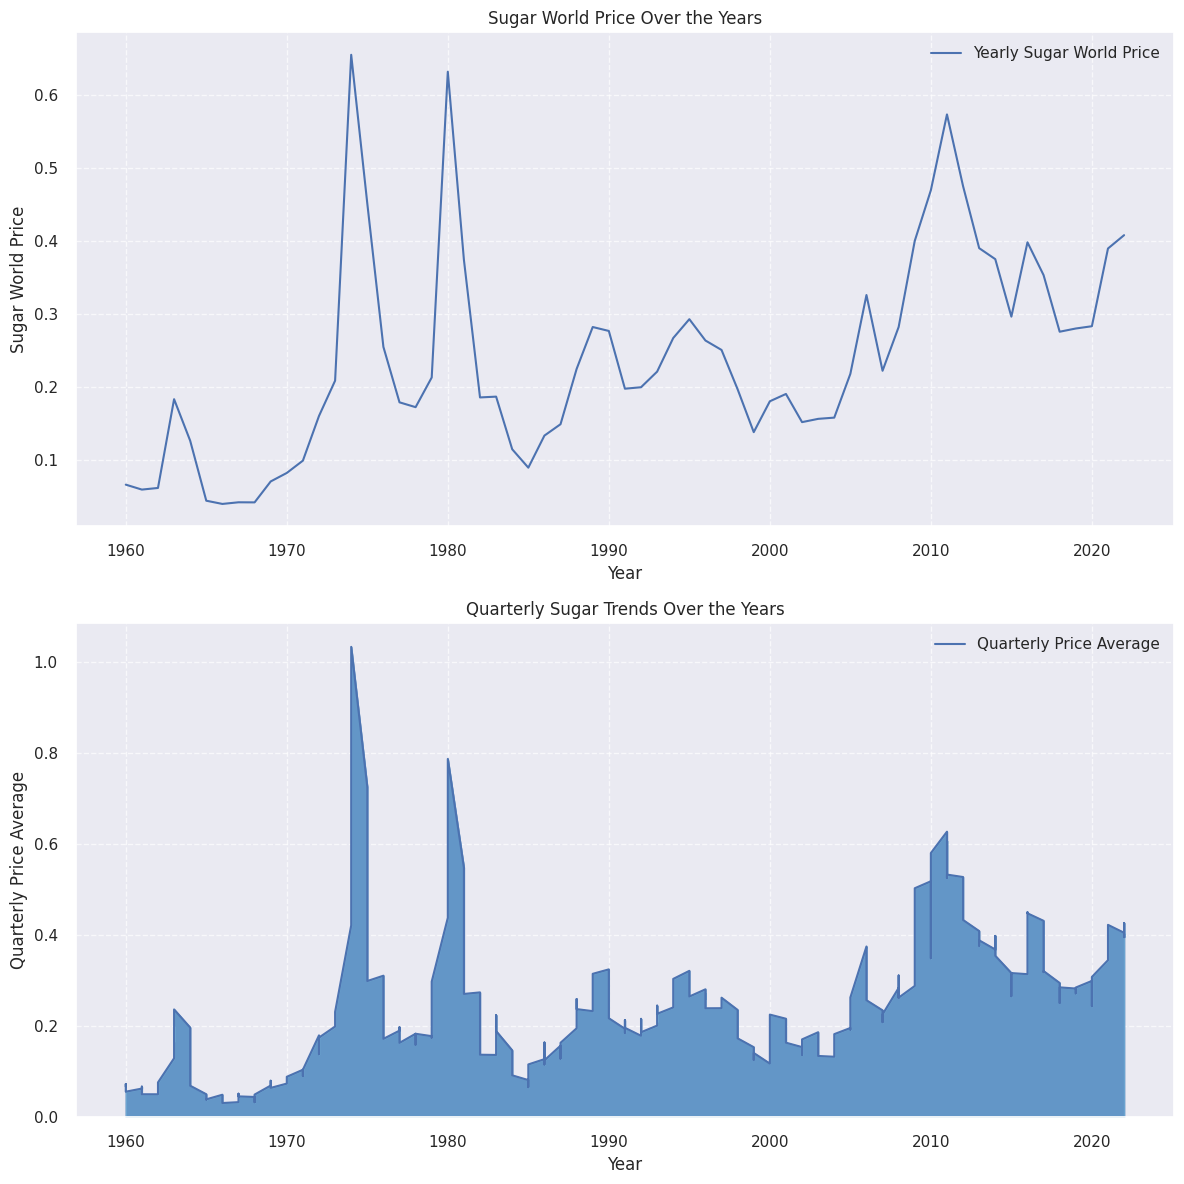

In [27]:
# Set grid style
sns.set(style='darkgrid')

# Create a figure and an array of subplots with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the line plot in the first subplot
df_sugar_yearly.plot(kind='line', y='sugar_world', ax=axs[0])
axs[0].set_title('Sugar World Price Over the Years')
axs[0].set_ylabel('Sugar World Price')
axs[0].set_xlabel('Year')
axs[0].legend(["Yearly Sugar World Price"])
axs[0].grid(True, linestyle='--', alpha=0.7)

# Plot the area plot in the second subplot
ax = df_sugar_quarterly[['year', 'price_quarterly']].plot(kind='area', x='year', y='price_quarterly', ax=axs[1])
ax.grid(True, linestyle='--', alpha=0.7)
ax.fill_between(df_sugar_quarterly['year'], df_sugar_quarterly['price_quarterly'], color='skyblue', alpha=0.4)
ax.set_title('Quarterly Sugar Trends Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Quarterly Price Average')
ax.legend(["Quarterly Price Average"])

plt.tight_layout()
plt.show()

Insights for use Cases:
* **Industry Insights:** Sugar producers, suppliers, and traders can gain insights into market dynamics to make informed decisions regarding production, inventory management, and trading strategies.
* **Policy and Trade Analysis:** Policymakers can use the data to understand the effects of trade policies, subsidies, and regulations on global sugar prices.
* **Consumer Behavior:** Understand how changes in sugar prices might influence consumer behavior, affecting consumption patterns and preferences.
* **Investment Decisions:** Investors can use price trend analysis to assess potential investment opportunities within the sugar industry.

## Conclusion:
In the culmination of our Exploratory Data Analysis (EDA) journey, we have uncovered noteworthy insights, particularly in relation to the quarterly and yearly price trends of the global sugar market. These revelations contribute to a more comprehensive understanding of the intricate dynamics within this industry.

Our analysis included examining the distribution of sugar prices through a histogram, which provided a visual representation of the data's frequency distribution. Additionally, we calculated percentiles, specifically focusing on the 95th percentile, to understand the range within which the majority of data points fall.

Furthermore, we employed a Quantile-Quantile (QQ) plot, which helped us assess the normality of the data distribution by comparing the quantiles of our dataset to those of a theoretical normal distribution. This plot served as an insightful diagnostic tool to evaluate the fit of our data to the normal distribution assumption.

Through meticulous data analysis and adept visualization techniques, we have highlighted significant patterns and trends, empowering stakeholders with the information necessary to make informed decisions and leverage the evolving prospects within the realm of sugar trading.